In [8]:
import networkx as nx
import itertools
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from utils import compute_partial_correlation, compute_test_statistic, compute_pvalue, phi

In [12]:
samples = np.genfromtxt('./imap_samples.csv', delimiter=' ')

In [14]:
samples.shape

(10000, 5)

In [23]:
def minimal_map(samples, permutation, alpha):
    n = len(permutation)
    combination = list(itertools.combinations(permutation, 2))
    
    G = nx.DiGraph()
    G.add_nodes_from(permutation)
        
    for n1, n2 in combination:
        if permutation.index(n1) < permutation.index(n2):
            i = n1
            j = n2
        else:
            i = n2
            j = n1
        
        pre_j = [e for e in permutation if permutation.index(e) < permutation.index(j)]
        pre_j.remove(i)

        S = pre_j
        pvalue = compute_pvalue(samples, i, j, S)
        if pvalue < alpha:
            G.add_edge(i, j)
    return G

i,j: 0 1
pre_j: []
i,j: 0 2
pre_j: [1]
i,j: 0 3
pre_j: [1, 2]
i,j: 0 4
pre_j: [1, 2, 3]
i,j: 1 2
pre_j: [0]
i,j: 1 3
pre_j: [0, 2]
i,j: 1 4
pre_j: [0, 2, 3]
i,j: 2 3
pre_j: [0, 1]
i,j: 2 4
pre_j: [0, 1, 3]
i,j: 3 4
pre_j: [0, 1, 2]


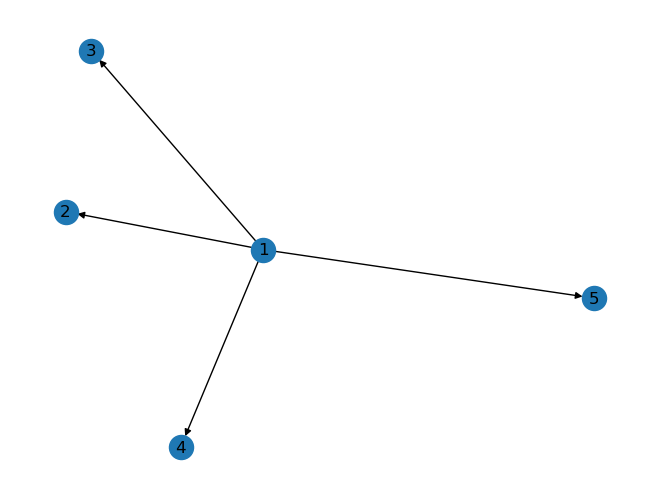

In [24]:
mapping = {}
separator = {}
for i in range(len([0,1,2,3,4])):
    mapping[i] = i+1
    
G = minimal_map(samples, [0,1,2,3,4], 0.05)
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True)

i,j: 4 3
pre_j: []
i,j: 4 2
pre_j: [3]
i,j: 4 1
pre_j: [3, 2]
i,j: 4 0
pre_j: [3, 2, 1]
i,j: 3 2
pre_j: [4]
i,j: 3 1
pre_j: [4, 2]
i,j: 3 0
pre_j: [4, 2, 1]
i,j: 2 1
pre_j: [4, 3]
i,j: 2 0
pre_j: [4, 3, 1]
i,j: 1 0
pre_j: [4, 3, 2]


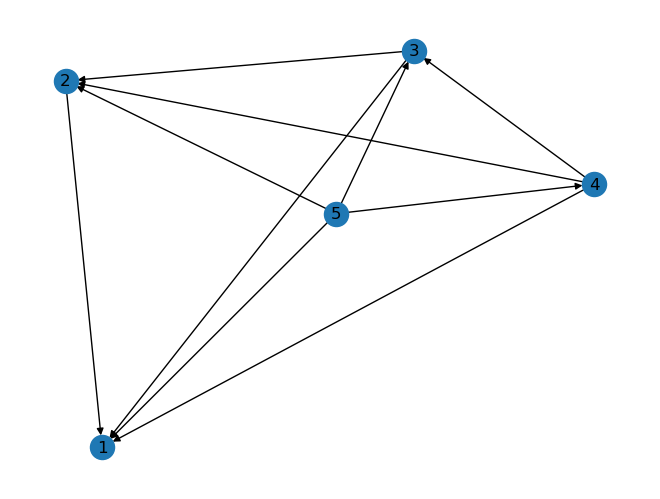

In [32]:
G = minimal_map(samples, [4, 3, 2, 1, 0], 0.05)
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True)

i,j: 4 3
pre_j: []
i,j: 4 0
pre_j: [3]
i,j: 4 1
pre_j: [3, 0]
i,j: 4 2
pre_j: [3, 0, 1]
i,j: 3 0
pre_j: [4]
i,j: 3 1
pre_j: [4, 0]
i,j: 3 2
pre_j: [4, 0, 1]
i,j: 0 1
pre_j: [4, 3]
i,j: 0 2
pre_j: [4, 3, 1]
i,j: 1 2
pre_j: [4, 3, 0]


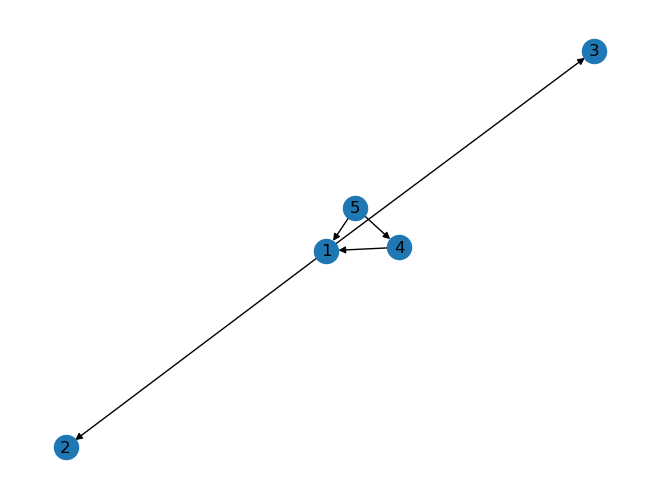

In [30]:
G = minimal_map(samples, [4, 3, 0, 1, 2], 0.05)
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True)